## Soccer Leagues
### Regression - Project 4

Submitted by: Mugdha Bajjuri

FIveThirtyEight recently released their newest batch of soccer power index (SPI) ratings for soccer teams around the world. This dataset contains 3 CSV files.

spi_matches.csv contains match-by-match SPI ratings and forecasts back to 2016.

spi_global_rankings.csv contains current SPI ratings and rankings for men's club teams.

spi_global_rankings_intl.csv contains current SPI ratings and rankings for men's international teams.

### Exploratory Data Analysis

#### Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D

#### Reading the csv files into dataframes

In [2]:
df = pd.read_csv('../data/raw/spi_matches.csv')
df_rankings = pd.read_csv('../data/raw/spi_global_rankings.csv')

#### Analysing the matches data

In [3]:
df.head()

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
0,2016-08-12,1843,French Ligue 1,Bastia,Paris Saint-Germain,51.16,85.68,0.0463,0.8380,0.1157,...,32.4,67.7,0.0,1.0,0.97,0.63,0.43,0.45,0.00,1.05
1,2016-08-12,1843,French Ligue 1,AS Monaco,Guingamp,68.85,56.48,0.5714,0.1669,0.2617,...,53.7,22.9,2.0,2.0,2.45,0.77,1.75,0.42,2.10,2.10
2,2016-08-13,2411,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,0.2921,...,38.1,22.2,2.0,1.0,0.85,2.77,0.17,1.25,2.10,1.05
3,2016-08-13,2411,Barclays Premier League,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,0.2847,...,43.6,34.6,0.0,1.0,1.11,0.68,0.84,1.60,0.00,1.05
4,2016-08-13,2411,Barclays Premier League,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,0.2689,...,31.9,48.0,1.0,1.0,0.73,1.11,0.88,1.81,1.05,1.05


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32278 entries, 0 to 32277
Data columns (total 22 columns):
date           32278 non-null object
league_id      32278 non-null int64
league         32278 non-null object
team1          32278 non-null object
team2          32278 non-null object
spi1           32278 non-null float64
spi2           32278 non-null float64
prob1          32278 non-null float64
prob2          32278 non-null float64
probtie        32278 non-null float64
proj_score1    32278 non-null float64
proj_score2    32278 non-null float64
importance1    22879 non-null float64
importance2    22879 non-null float64
score1         27109 non-null float64
score2         27109 non-null float64
xg1            14861 non-null float64
xg2            14861 non-null float64
nsxg1          14861 non-null float64
nsxg2          14861 non-null float64
adj_score1     14861 non-null float64
adj_score2     14861 non-null float64
dtypes: float64(17), int64(1), object(4)
memory usage: 5.4+ M

In [5]:
#In the original data We have rows of matches which aren't played yet, so removing them
df = df.dropna()

#### Analyzing the rankings data

In [6]:
df_rankings.head()

,rank,prev_rank,name,league,off,def,spi
0,1,1,Manchester City,Barclays Premier League,3.34,0.24,95.24
1,2,2,Liverpool,Barclays Premier League,2.95,0.28,92.96
2,3,3,Bayern Munich,German Bundesliga,3.29,0.46,92.43
3,4,4,Paris Saint-Germain,French Ligue 1,2.88,0.47,89.55
4,5,7,Real Madrid,Spanish Primera Division,2.79,0.46,88.98


In [7]:
df_rankings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 7 columns):
rank         629 non-null int64
prev_rank    629 non-null int64
name         629 non-null object
league       629 non-null object
off          629 non-null float64
def          629 non-null float64
spi          629 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 34.5+ KB


In [8]:
#dropping columns which we don't use
to_drop = ['prev_rank','off','def','spi']
df_rankings = df_rankings.drop(to_drop, axis=1)

In [9]:
df_rankings.head()

,rank,name,league
0,1,Manchester City,Barclays Premier League
1,2,Liverpool,Barclays Premier League
2,3,Bayern Munich,German Bundesliga
3,4,Paris Saint-Germain,French Ligue 1
4,5,Real Madrid,Spanish Primera Division


#### Finding winner of the match based on the goals scored

In [10]:
#Created new column to specify winner of the match, appends "tie" when the match is tied.

#name column implies the winner team


winner = []
for i, row in df.iterrows():
    if row.score1 > row.score2:
        winner.append(row.team1)
    elif row.score1 == row.score2:
        winner.append("tie")
    else:
        winner.append(row.team2)
df['name'] = pd.DataFrame(winner, index =df.index)
df.head()

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2,name
0,2016-08-12,1843,French Ligue 1,Bastia,Paris Saint-Germain,51.16,85.68,0.0463,0.8380,0.1157,...,67.7,0.0,1.0,0.97,0.63,0.43,0.45,0.00,1.05,Paris Saint-Germain
1,2016-08-12,1843,French Ligue 1,AS Monaco,Guingamp,68.85,56.48,0.5714,0.1669,0.2617,...,22.9,2.0,2.0,2.45,0.77,1.75,0.42,2.10,2.10,tie
2,2016-08-13,2411,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,0.2921,...,22.2,2.0,1.0,0.85,2.77,0.17,1.25,2.10,1.05,Hull City
3,2016-08-13,2411,Barclays Premier League,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,0.2847,...,34.6,0.0,1.0,1.11,0.68,0.84,1.60,0.00,1.05,West Bromwich Albion
4,2016-08-13,2411,Barclays Premier League,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,0.2689,...,48.0,1.0,1.0,0.73,1.11,0.88,1.81,1.05,1.05,tie


## Feature Engineering

#### Merging the tables spi_matches and spi_global_rankings, so that we can use the rankikngs column as feature for the model

In [11]:
#Merging the rankings table
df_final = pd.merge(df, df_rankings, on=['name','league'], how='outer')

In [12]:
df_final.head()

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2,name,rank
0,2016-08-12,1843.0,French Ligue 1,Bastia,Paris Saint-Germain,51.16,85.68,0.0463,0.8380,0.1157,...,0.0,1.0,0.97,0.63,0.43,0.45,0.00,1.05,Paris Saint-Germain,4.0
1,2016-08-21,1843.0,French Ligue 1,Paris Saint-Germain,Metz,85.38,55.44,0.8277,0.0492,0.1231,...,3.0,0.0,4.10,0.94,4.97,1.00,2.63,0.00,Paris Saint-Germain,4.0
2,2016-09-16,1843.0,French Ligue 1,Caen,Paris Saint-Germain,55.44,84.53,0.0852,0.7589,0.1560,...,0.0,6.0,1.21,3.54,0.76,2.01,0.00,6.09,Paris Saint-Germain,4.0
3,2016-10-01,1843.0,French Ligue 1,Paris Saint-Germain,Bordeaux,86.06,62.51,0.7923,0.0670,0.1407,...,2.0,0.0,2.10,0.67,1.62,0.14,2.10,0.00,Paris Saint-Germain,4.0
4,2016-10-15,1843.0,French Ligue 1,AS Nancy Lorraine,Paris Saint-Germain,48.82,86.21,0.0639,0.7912,0.1449,...,1.0,2.0,0.26,0.54,0.85,0.44,1.05,2.10,Paris Saint-Germain,4.0


#### Handling matches which were tied

In [13]:
#tied matches will have rank as 0.1
df_final['rank'] = df_final['rank'].fillna(0.1)

### Correlation between the Features

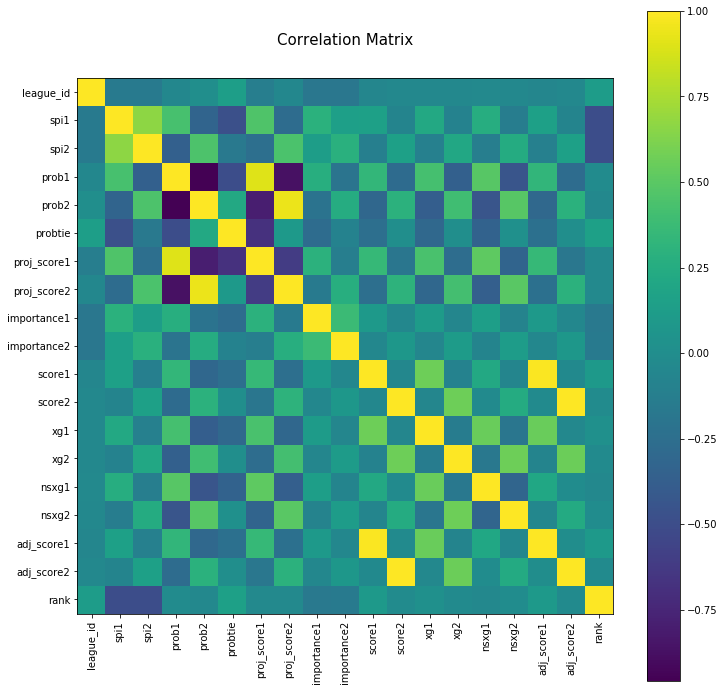

In [14]:
corr = df_final.corr()
plt.figure(num=None, figsize=(12, 12), facecolor='w', edgecolor='k')
corrMat = plt.matshow(corr,  fignum = 1)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.gca().xaxis.tick_bottom()
plt.colorbar(corrMat)
plt.title('Correlation Matrix', fontsize=15)
plt.show()

In [15]:
#matches per league
df_leagues  = df.groupby('league').size().reset_index(name='matches')

In [16]:
df_leagues.head()

,league,matches
0,Argentina Primera Division,762
1,Australian A-League,49
2,Barclays Premier League,1224
3,Brasileiro Série A,787
4,Chinese Super League,327


In [17]:
goals1 = df_final.groupby("team1")["score1"].sum().reset_index().sort_values(by = "score1",ascending = False)
goals1 = goals1.rename(columns={"team1": "team"})

goals2 = df_final.groupby("team2")["score2"].sum().reset_index().sort_values(by = "score2",ascending = False)
goals2 = goals2.rename(columns={"team2": "team"})

goals = pd.merge(goals1, goals2, on=['team']).set_index(['team']).sum(axis=1).reset_index(name='goals')
goals = goals.sort_values(by=['goals'], ascending=False)
goals.head()

,team,goals
3,Manchester City,363.0
0,Paris Saint-Germain,358.0
1,Barcelona,358.0
4,Liverpool,344.0
2,Bayern Munich,343.0


### Bar plot shows the teams with highest goals

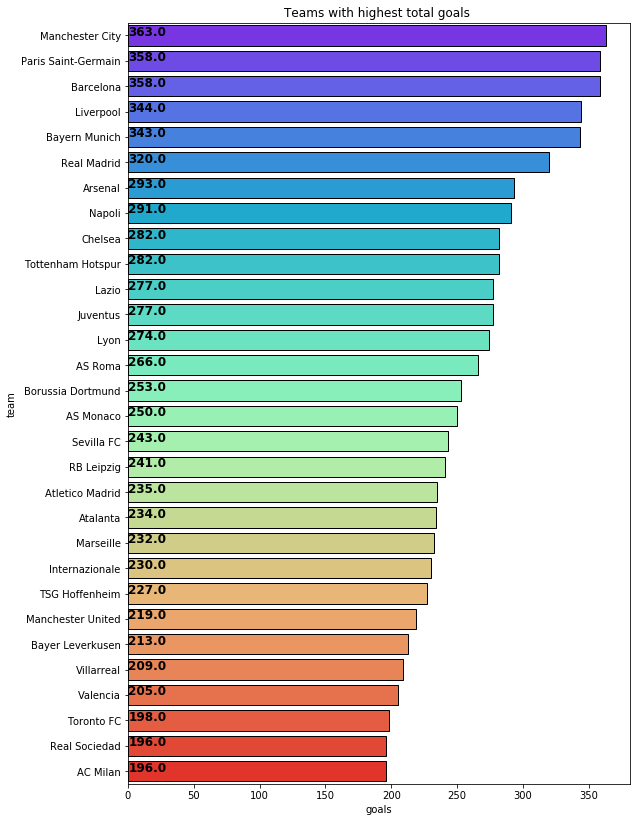

In [18]:
plt.figure(figsize=(9,14))
ax = sns.barplot(x="goals",y="team",
                 data=goals[:30],palette="rainbow",
                linewidth = 1,edgecolor = "k"*30)
for i,j in enumerate(goals["goals"][:30]):
    ax.text(.3,i,j,weight="bold",color = "k",fontsize =12)
plt.title("Teams with highest total goals ")
plt.show()

### Bar graph shows matches played in each league

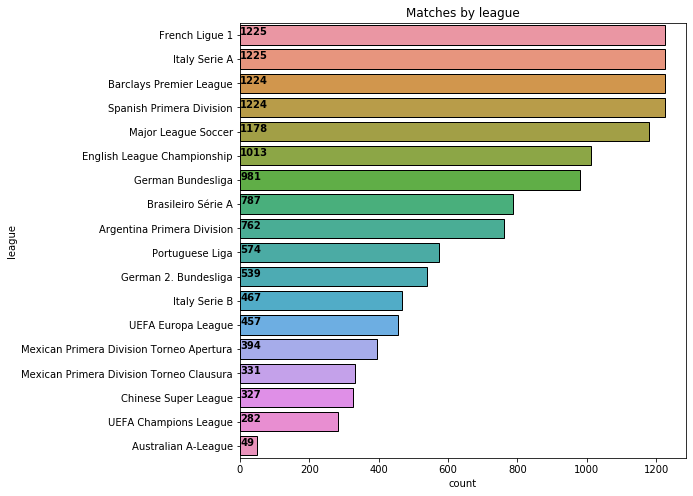

In [19]:
plt.figure(figsize=(8,8))
ax = sns.countplot(y = df['league'],
                   order=df['league'].value_counts().index,
                   linewidth = 1,
                   edgecolor = "k"*df['league'].nunique()
                 )
for i,j in enumerate(df['league'].value_counts().values):
    ax.text(.7,i,j,weight = "bold")
plt.title("Matches by league")
plt.show()

In [20]:
matches1 = df_final.groupby("team1").size().reset_index(name='matches')
matches2 = df_final.groupby("team2").size().reset_index(name='matches')
matches1 = matches1.rename(columns={"team1": "team"})
matches2 = matches2.rename(columns={"team2": "team"})
matches = pd.merge(matches1, matches2, on=['team']).set_index(['team']).sum(axis=1).reset_index(name='matches')

In [21]:
df_rankings = df_rankings.rename(columns={'name':'team'})
ranks = pd.merge(goals,df_rankings,on='team', how='left')
ranks.head()

,team,goals,rank,league
0,Manchester City,363.0,1.0,Barclays Premier League
1,Paris Saint-Germain,358.0,4.0,French Ligue 1
2,Barcelona,358.0,6.0,Spanish Primera Division
3,Liverpool,344.0,2.0,Barclays Premier League
4,Bayern Munich,343.0,3.0,German Bundesliga


### 3D scatter plot - Show relation between number of goals by each team, global rank of the team and Matches played by the team

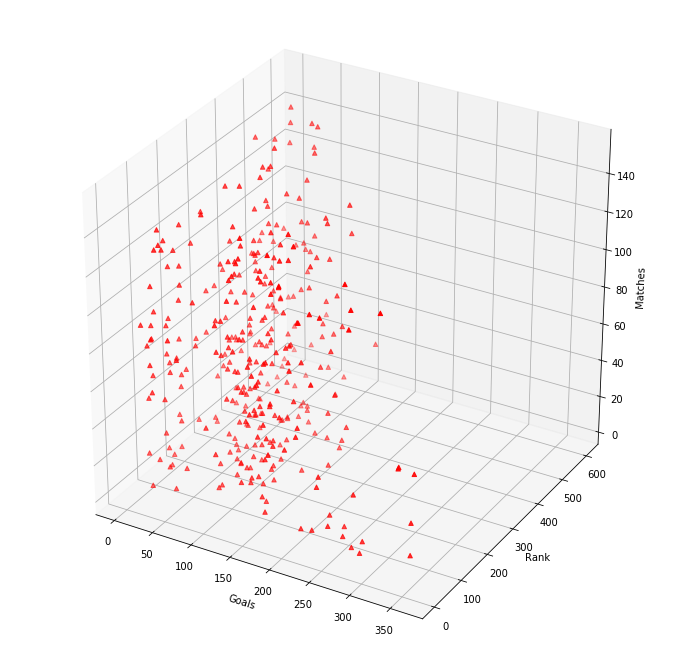

In [22]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

x = goals['goals']
y = ranks['rank']
z = matches['matches']

ax.scatter(x,y,z, c='r', marker='^')

ax.set_xlabel('Goals')
ax.set_ylabel('Rank')
ax.set_zlabel('Matches')

plt.show()

In [23]:
df_final = df_final.dropna()

## Label Encoding

In [24]:
obj1 = LabelEncoder()
df_final['team1'] = obj1.fit_transform(df_final['team1'].astype('str'))
df_final['team2'] = obj1.fit_transform(df_final['team2'].astype('str'))

## Train - Test split

In [25]:
x = df_final.drop(columns=['date','league_id','league','name','score1','score2'])
y = df_final.score1
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,random_state=1)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(9779, 18) (9779,)
(3260, 18) (3260,)


In [26]:
x1 = df_final.drop(columns=['date','league_id','league','name','score1','score2'])
y1 = df_final.score2
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y1,random_state=1)
print (X_train1.shape, y_train1.shape)
print (X_test1.shape, y_test1.shape)

(9779, 18) (9779,)
(3260, 18) (3260,)


In [27]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
logreg1 = LogisticRegression()
logreg1.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on train set for score1: {:.2f}'.format(logreg1.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set for score1: {:.2f}'.format(logreg1.score(X_test, y_test)))
print("------------------------------------------------------------------------------------------")
logreg2 = LogisticRegression()
logreg2.fit(X_train1, y_train1)
print('Accuracy of Logistic regression classifier on train set for score1: {:.2f}'.format(logreg2.score(X_train1, y_train1)))
print('Accuracy of Logistic regression classifier on test set for score2: {:.2f}'.format(logreg2.score(X_test1, y_test1)))

Accuracy of Logistic regression classifier on train set for score1: 0.73
Accuracy of Logistic regression classifier on test set for score1: 0.73
------------------------------------------------------------------------------------------
Accuracy of Logistic regression classifier on train set for score1: 0.73
Accuracy of Logistic regression classifier on test set for score2: 0.72


### Mean Square Errors

In [29]:
# Print logistic Regression Mean Square Error for Team 1

Logregpredtrain = logreg1.predict(X_train)
# Calculate the Square errors
Logregerrortrain = (Logregpredtrain - y_train)**2
LogregMSEtrain =  round(np.mean(Logregerrortrain),3)
print('Mean Square Error Train team1:', LogregMSEtrain)



Logregpredtest = logreg1.predict(X_test)
Logregerrortest = (Logregpredtest - y_test)**2
LogregMSEtest = round(np.mean(Logregerrortest),3)
print('Mean Square Error Test team1:', LogregMSEtest)

Mean Square Error Train team1: 0.428
Mean Square Error Test team1: 0.402


In [30]:
# Print logistic Regression Mean Square Error for Team 2

Logregpredtrain2 = logreg2.predict(X_train1)
# Calculate the Square errors
Logregerrortrain2 = (Logregpredtrain2 - y_train1)**2
LogregMSEtrain2 =  round(np.mean(Logregerrortrain2),3)
print('Mean Square Error Train team2:', LogregMSEtrain2)



Logregpredtest2 = logreg2.predict(X_test1)
Logregerrortest2 = (Logregpredtest2 - y_test1)**2
LogregMSEtest2 = round(np.mean(Logregerrortest2),3)
print('Mean Square Error Test team2:', LogregMSEtest2)

Mean Square Error Train team2: 0.377
Mean Square Error Test team2: 0.379


# Linear regression

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cannot use Rank 1 matrix in scikit learn
# Creating Model
reg = LinearRegression()
# Fitting training data

reg1 = reg.fit(X_train, y_train)
# Y Prediction
Y_pred = reg1.predict(X_train)
Y_predT = reg1.predict(X_test)

# Calculating RMSE and R2 Score
mse = mean_squared_error(y_train, Y_pred)
mse_test = mean_squared_error(y_test, Y_predT)
rmse = np.sqrt(mse)
r_score1 = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)
regmsetrain1 = np.sqrt(mse)
regmsetest1 = np.sqrt(mse_test)


print('LinearRegression -- Mean square error on train set for score1 for score1')
print(np.sqrt(mse))
print('LinearRegression -- Mean square error on test set for score1 for score1')
print(np.sqrt(mse_test))

print("------------------------------------------------------------------------------------------")

print('LinearRegression -- Accuracy on train set for score1')
print(r_score1)
print('LinearRegression -- Accuracy on test set for score1')
print(test_score)

LinearRegression -- Mean square error on train set for score1 for score1
0.17126798746211974
LinearRegression -- Mean square error on test set for score1 for score1
0.1688752205975808
------------------------------------------------------------------------------------------
LinearRegression -- Accuracy on train set for score1
0.982507283255609
LinearRegression -- Accuracy on test set for score1
0.9819182819136011


In [32]:
reg2 = reg.fit(X_train1, y_train1)
# Y Prediction
Y_pred1 = reg2.predict(X_train1)
Y_pred1T = reg2.predict(X_test1)

# Calculating RMSE and R2 Score
mse1 = mean_squared_error(y_train1, Y_pred1)
mse1_test = mean_squared_error(y_test1, Y_pred1T)
rmse1 = np.sqrt(mse1)
r_score2 = reg.score(X_train1, y_train1)
test_score2 = reg.score(X_test1, y_test1)
regmsetrain2 = np.sqrt(mse1)
regmsetest2 = np.sqrt(mse1_test)

print('LinearRegression -- Mean square error on train set for score1 for score2')
print(np.sqrt(mse1))
print('LinearRegression -- Accuracy on train for score2')
print(r_score2)

print("------------------------------------------------------------------------------------------")

print('LinearRegression -- Mean square error on test set for score1 for score2')
print(np.sqrt(mse1_test))
print('LinearRegression -- Accuracy on test set for score2')
print(test_score2)

LinearRegression -- Mean square error on train set for score1 for score2
0.1322271970955995
LinearRegression -- Accuracy on train for score2
0.9863952103628401
------------------------------------------------------------------------------------------
LinearRegression -- Mean square error on test set for score1 for score2
0.12752556335513365
LinearRegression -- Accuracy on test set for score2
0.9873187142614218


# Random forest

In [33]:
# Regression Model - Team 1
from sklearn.ensemble import RandomForestRegressor
rfTeam1 = RandomForestRegressor(n_estimators = 50)
rfTeam1.fit(X_train,y_train);

In [34]:
# Print Random Forest Regression Mean Square Error for Team 1

rfPredictTrainTeam1 = rfTeam1.predict(X_train)
# Calculate the Square errors
rfErrorTrainTeam1 = (rfPredictTrainTeam1 - y_train)**2
rfTrainTeam1MSE =  round(np.mean(rfErrorTrainTeam1),3)
print('Mean Square Error Train team1:', rfTrainTeam1MSE)



rfPredictTeam1 = rfTeam1.predict(X_test)
rfErrorTeam1 = (rfPredictTeam1 - y_test)**2
rfTestTeam1MSE = round(np.mean(rfErrorTeam1),3)
print('Mean Square Error Test team1:', rfTestTeam1MSE)

Mean Square Error Train team1: 0.001
Mean Square Error Test team1: 0.009


In [35]:
# Regression Model - Team 2
rfTeam2 = RandomForestRegressor(n_estimators = 50)
rfTeam2.fit(X_train1,y_train1);

In [36]:
# Print Random Forest Regression Mean Square Error for Team 2

rfPredictTrainTeam2 = rfTeam2.predict(X_train1)
# Calculate the Square errors
rfErrorTrainTeam2 = (rfPredictTrainTeam2 - y_train1)**2
rfTrainTeam2MSE =  round(np.mean(rfErrorTrainTeam2),3)
print('Mean Square Error Train team2:', rfTrainTeam2MSE)



rfPredictTeam2 = rfTeam2.predict(X_test1)
rfErrorTeam2 = (rfPredictTeam2 - y_test1)**2
rfTestTeam2MSE = round(np.mean(rfErrorTeam2),3)
print('Mean Square Error Test team2:', rfTestTeam2MSE)

Mean Square Error Train team2: 0.001
Mean Square Error Test team2: 0.004


## Regression using the "Random Forest Model" performed better compared to other models

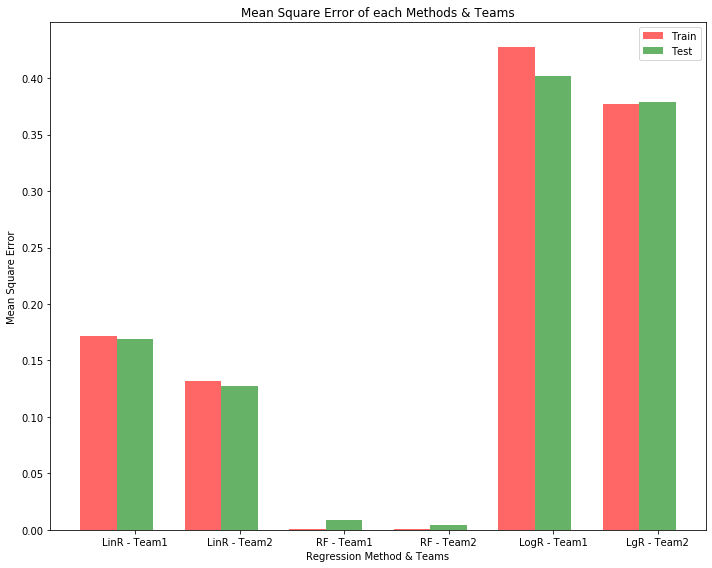

In [37]:
# Plot the Mean Square Error for Comparison
n_groups = 6
train_mse = (regmsetrain1, regmsetrain2 ,rfTrainTeam1MSE,rfTrainTeam2MSE,LogregMSEtrain,LogregMSEtrain2)
test_mse = (regmsetest1,regmsetest2,rfTestTeam1MSE,rfTestTeam2MSE,LogregMSEtest,LogregMSEtest2)
 
# create plot
fig, ax = plt.subplots(figsize=(10,8))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.6
 
rects1 = plt.bar(index, train_mse, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Train')
 
rects2 = plt.bar(index + bar_width, test_mse, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Test')
 
plt.xlabel('Regression Method & Teams')
plt.ylabel('Mean Square Error')
plt.title('Mean Square Error of each Methods & Teams')
plt.xticks(index + bar_width, ('LinR - Team1', 'LinR - Team2', 'RF - Team1', 'RF - Team2', 'LogR - Team1', 'LgR - Team2'))
plt.legend()
 
plt.tight_layout()